<a href="https://colab.research.google.com/github/Prateeklk/ml-projects/blob/main/Apriori_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apriori

## Importing the libraries

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=13cb6a23cddbdb1ae0cd24509a1cdcce001f84cbf1d190cfef15ffe3efc07897
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preprocessing

In [36]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)


## Training the Apriori model on the dataset

In [37]:
length = len(dataset)
print(length)

7501


In [38]:
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

In [51]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 2, min_length = 2, max_length = 2)

## Visualising the results

### Displaying the first results coming directly from the output of the apriori function

In [52]:
results = list(rules)

In [53]:
results

[RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'bacon', 'spaghetti'}), support=0.003199573390214638, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bacon'}), items_add=frozenset({'spaghetti'}), confidence=0.36923076923076925, lift=2.1206738131699847)]),
 RelationRecord(items=frozenset({'black tea', 'milk'}), support=0.004266097853619517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'black tea'}), items_add=frozenset({'milk'}), confidence=0.29906542056074764, lift=2.3079112341833006)]),
 RelationRecord(items=frozenset({'blueberries', 'spaghetti'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'blueberries'}), items_add=frozenset({'spaghetti'}), confidence=0.37681159420289856, lift=2

### Putting the results well organised into a Pandas DataFrame

In [54]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

### Displaying the results non sorted

In [55]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,almonds,burgers,0.005199,0.254902,2.923577
1,bacon,spaghetti,0.003200,0.369231,2.120674
2,black tea,milk,0.004266,0.299065,2.307911
3,blueberries,spaghetti,0.003466,0.376812,2.164214
4,body spray,french fries,0.004266,0.372093,2.177122
5,ham,burgers,0.005599,0.211055,2.420681
6,cereals,milk,0.007066,0.274611,2.119198
7,light cream,chicken,0.004533,0.290598,4.843951
8,tomato sauce,chocolate,0.005066,0.358491,2.187988
9,cider,eggs,0.004266,0.405063,2.253991


### Displaying the results sorted by descending lifts

In [56]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
16,fromage blanc,honey,0.003333,0.245098,5.164271
7,light cream,chicken,0.004533,0.290598,4.843951
12,pasta,escalope,0.005866,0.372881,4.700812
38,pasta,shrimp,0.005066,0.322034,4.506672
37,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
29,tomato sauce,ground beef,0.005333,0.377358,3.840659
11,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
22,herb & pepper,ground beef,0.015998,0.323450,3.291994
30,light cream,olive oil,0.003200,0.205128,3.114710
0,almonds,burgers,0.005199,0.254902,2.923577


from matplotlib import pyplot as plt
_df_0['Support'].plot(kind='hist', bins=20, title='Support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Confidence'].plot(kind='hist', bins=20, title='Confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Lift'].plot(kind='hist', bins=20, title='Lift')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Left Hand Side').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Right Hand Side').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Support', y='Confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Confidence', y='Lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Support'].plot(kind='line', figsize=(8, 4), title='Support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Confidence'].plot(kind='line', figsize=(8, 4), title='Confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Lift'].plot(kind='line', figsize=(8, 4), title='Lift')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Right Hand Side'].value_counts()
    for x_label, grp in _df_10.groupby('Left Hand Side')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Left Hand Side')
_ = plt.ylabel('Right Hand Side')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Left Hand Side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Support', y='Left Hand Side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Right Hand Side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Support', y='Right Hand Side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Left Hand Side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Confidence', y='Left Hand Side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Right Hand Side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Confidence', y='Right Hand Side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

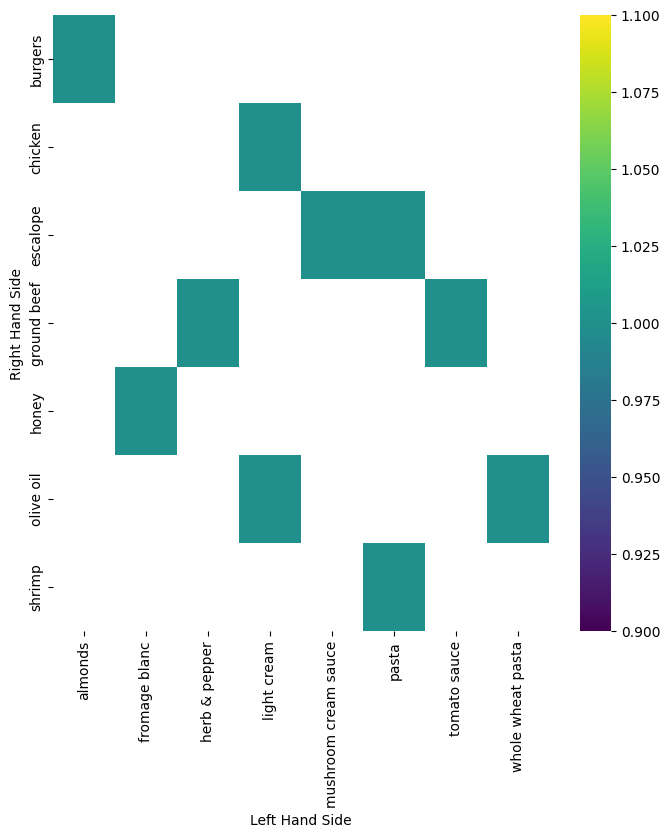

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Right Hand Side'].value_counts()
    for x_label, grp in _df_10.groupby('Left Hand Side')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Left Hand Side')
_ = plt.ylabel('Right Hand Side')